Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


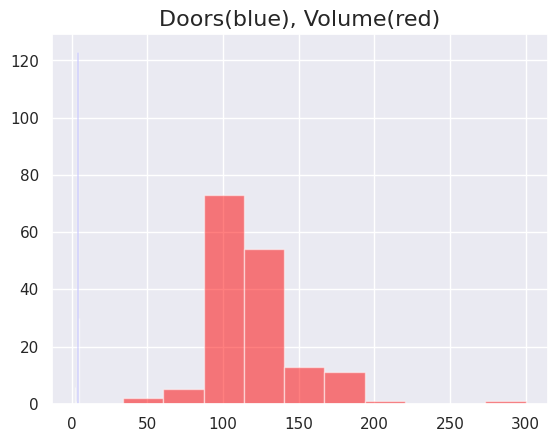

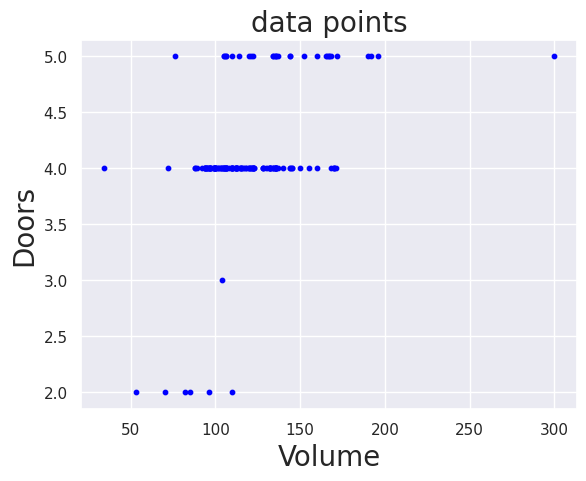

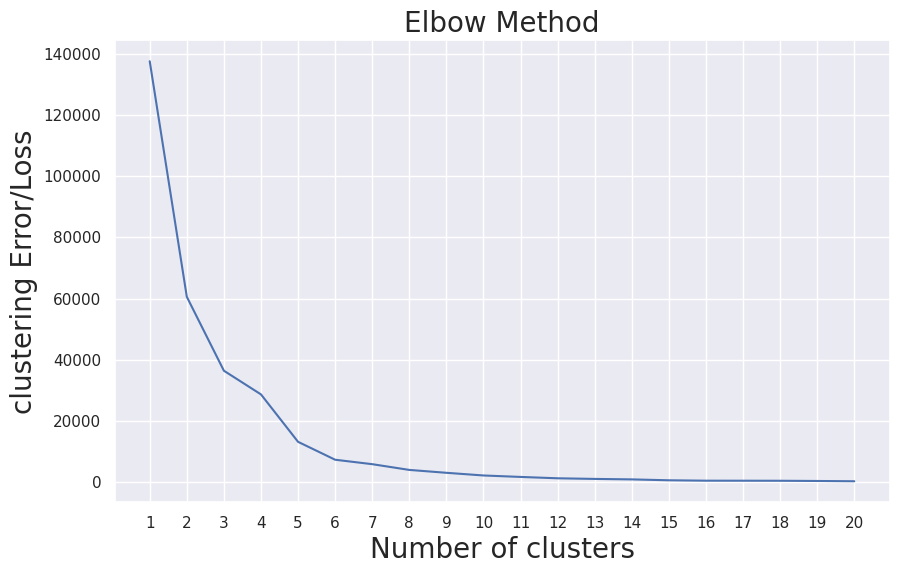

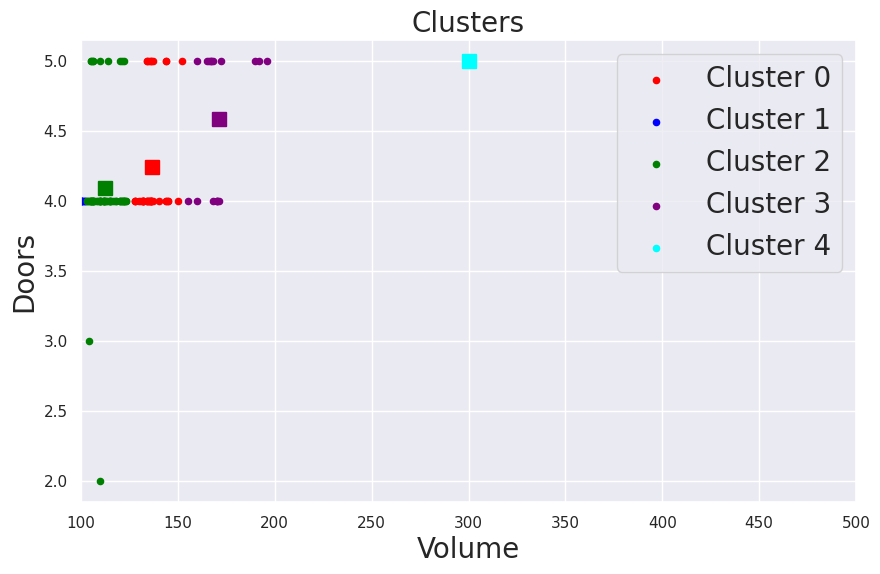

--- Data in Cluster 0, size 37 ---
['SUV' 'SUV' 'Pickup' 'Van' 'Pickup' 'Pickup' 'SUV' 'SUV' 'SUV' 'SUV'
 'SUV' 'Pickup' 'SUV' 'Pickup' 'SUV' 'SUV' 'SUV' 'Pickup' 'Jeep' 'SUV'
 'Pickup' 'SUV' 'SUV' 'SUV' 'SUV' 'SUV' 'SUV' 'SUV' 'Pickup' 'Pickup'
 'SUV' 'SUV' 'SUV' 'Jeep' 'SUV' 'SUV' 'Jeep'] [[134 5]
 [134 5]
 [130 4]
 [150 4]
 [135 4]
 [132 4]
 [135 4]
 [145 4]
 [137 4]
 [131 4]
 [137 5]
 [132 4]
 [145 4]
 [132 4]
 [136 4]
 [134 4]
 [144 5]
 [132 4]
 [135 5]
 [136 5]
 [134 4]
 [152 5]
 [128 4]
 [128 4]
 [128 4]
 [140 4]
 [144 5]
 [136 5]
 [132 4]
 [135 4]
 [134 4]
 [136 4]
 [144 4]
 [136 4]
 [136 4]
 [144 4]
 [136 4]]
{'Jeep': 3, 'Pickup': 9, 'SUV': 24, 'Van': 1}
--- Data in Cluster 1, size 43 ---
['Sedan' 'Sedan' 'Sedan' 'Sedan' 'Sedan' 'SUV' 'SUV' 'Jeep' 'SUV' 'Sedan'
 'Sedan' 'Sedan' 'Jeep' 'Sedan' 'Sedan' 'Sedan' 'Jeep' 'Sedan' 'Jeep'
 'Sedan' 'Pickup' 'Sedan' 'Sedan' 'SUV' 'SUV' 'Pickup' 'Sedan' 'Sedan'
 'SUV' 'Sedan' 'Sedan' 'Sedan' 'Sedan' 'SUV' 'Sedan' 'Sedan' 'Sedan' 'SUV'
 'S

In [15]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Plot styling
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from google.colab import drive
drive.mount('/content/drive')
#--------------------------------------------------------------------------------------------------
def get_data():

#----Read the dataset as a panda
    dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AllCars.csv')
#----Show the first five rows of the table dataset, and the number of samples
    # print(f"{dataset.head()} and there are {len(dataset)} rows")
#----Descriptive statistics of the dataset
    # print(f"Some statistics {dataset.describe()}")

#----Show the distribution/histogram of income and spending
    figure, plot_area = plt.subplots()
#----Set alpha=0.5 to make the figure to be transparent
    plot_area.hist(dataset['Volume'], color='red', alpha=0.5)
    plot_area.hist(dataset['Doors'], color='blue', alpha=0.5)
    plot_area.set_title('Doors(blue), Volume(red)',fontsize=16)
    plt.draw()
    plt.show()
    plt.close()
#----Each dot in the figure corresponds to a customer. Each dot shows the feature vector of a
#----customer. There are 303 dots/customers/vectors
    figure, plot_area = plt.subplots()
    plot_area.scatter(dataset['Volume'], dataset['Doors'], c='blue', s=10)
    plot_area.set_title('data points', fontsize=20)
    plot_area.set_xlabel('Volume', fontsize=20)
    plot_area.set_ylabel('Doors', fontsize=20)
    plt.draw()
    plt.show()
    plt.close()

#----The functions/methods in sk-learn work well on numpy arrays. Some functions crash if the
#----input data type is pandas dataframe. Convert dataframe to numpy array
    data = dataset.values

#---Split off the first two columns for clustering
    return data[:, :-1],data[:, -1]
#--------------------------------------------------------------------------------------------------
def plot_clusters(number_of_clusters,data,centers,label):

#----Show the centers together with the data points
    color = ['red', 'blue', 'green', 'purple', 'cyan', 'orange']
    figure, plot_area = plt.subplots(figsize=(10,6))
    for cluster_number in range(0, number_of_clusters):
        plot_area.scatter(data[label==cluster_number, 0], data[label==cluster_number, 1], \
c=color[cluster_number], s=20, label='Cluster '+str(cluster_number))
        plot_area.plot(centers[cluster_number,0], centers[cluster_number,1], \
c=color[cluster_number], marker='s', markersize=10)
    plot_area.set_title('Clusters', fontsize=20)
    plot_area.set_xlabel('Volume', fontsize=20)
    plot_area.set_ylabel('Doors', fontsize=20)
    plot_area.set_xlim(100, 500)
    plot_area.legend(fontsize=20)
    plot_area.set_aspect('auto')
    plt.show()
    plt.draw()
    plt.close()
#--------------------------------------------------------------------------------------------------
def do_cluster(number_of_clusters,data):

#----Define a machine learning model using Kmeans algorithm
    model = KMeans(n_clusters=number_of_clusters, random_state=0)
#----Fit the model to data
    model.fit(data)
#----Get the cluster label of each customer
    labels = model.predict(data)
    # print(f"{label}")
#----Each cluster has a center
    centers = model.cluster_centers_
    # print(f"{centers}")

#----Plot the clusters
    plot_clusters(number_of_clusters,data,centers,labels)

    return(model,labels)
#--------------------------------------------------------------------------------------------------
def list_clusters(model,labels,features,classes):

    for cluster_number in range(model.n_clusters):
#----Select rows where the label is equal to the current cluster index
        cluster_data = classes[labels == cluster_number]
        other_data = features[labels == cluster_number]
        print(f"--- Data in Cluster {cluster_number}, size {len(cluster_data)} ---")
        print(cluster_data, other_data)
        values, np_counts = np.unique(cluster_data, return_counts=True)
        counts = [int(count) for count in np_counts]
        print(f"{dict(zip(values, counts))}")
#--------------------------------------------------------------------------------------------------
def plot_losses(data):

#----Using the elbow method to find the best number of clusters
#----Apply k-means with different number of clusters, and study the relationship between
#----error/loss of clustering and the number of clusters.
    error_list = []
    for K in range(1,21):
        model = KMeans(n_clusters=K, random_state=0)
        model.fit(data)
        error_list.append(model.inertia_)
    figure, plot_area = plt.subplots(figsize=(10,6))
    plot_area.plot(range(1,21), error_list)
    plot_area.set_title('Elbow Method', fontsize=20)
    plot_area.set_xlabel('Number of clusters', fontsize=20)
    plot_area.set_ylabel('clustering Error/Loss', fontsize=20)
    plot_area.set_xticks(range(1,21));
    plt.draw()
    plt.show()
    plt.close()
#--------------------------------------------------------------------------------------------------
def main():

    features, classes = get_data()
    # model,labels = do_cluster(3,features)
    # list_clusters(model,labels,features,classes)
#----Elbow Method to choose the number clusters: Choose the number of clusters so that
#----adding another new cluster doesn't significantly decrease clustering error/loss.
#----It is subjective because it depends on the judgement of the user.
    plot_losses(features)
    model,labels = do_cluster(5,features)
    list_clusters(model,labels,features,classes)

    plt.close('all')
#--------------------------------------------------------------------------------------------------
if __name__ == "__main__":
    main()
#--------------------------------------------------------------------------------------------------